In [1]:
import pandas as pd

CSV_READ = pd.read_csv("../input/creditcardfraud/creditcard.csv")

In [2]:
non_fraud = len(CSV_READ[CSV_READ.Class == 0])
fraud = len(CSV_READ[CSV_READ.Class == 1])
fraud_percent = (fraud / (fraud + non_fraud)) * 100

print("Number of Genuine transactions: ", non_fraud)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Fraud transactions: {:.4f}".format(fraud_percent))

Number of Genuine transactions:  284315
Number of Fraud transactions:  492
Percentage of Fraud transactions: 0.1727


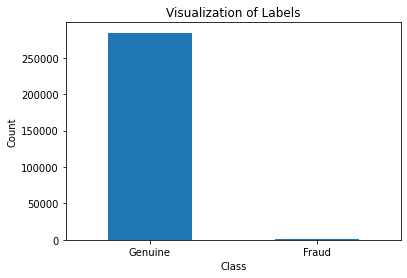

In [3]:
import matplotlib.pyplot as plt
labels = ["Genuine", "Fraud"]
count_classes = CSV_READ.value_counts(CSV_READ['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [4]:
import numpy as np
from sklearn.preprocessing import StandardScaler

CSV_READ["NormalizedAmount"] = StandardScaler().fit_transform(CSV_READ["Amount"].values.reshape(-1, 1))
CSV_READ.drop(["Amount", "Time"], inplace= True, axis= 1)

Y = CSV_READ["Class"]
X = CSV_READ.drop(["Class"], axis= 1)

In [5]:
from sklearn.model_selection import train_test_split
(train_X, test_X, train_Y, test_Y) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of train_X: ", train_X.shape)
print("Shape of test_X: ", test_X.shape)
print("Shape of train_Y: ", train_Y.shape)
print("Shape of test_Y: ", test_Y.shape)

Shape of train_X:  (199364, 29)
Shape of test_X:  (85443, 29)
Shape of train_Y:  (199364,)
Shape of test_Y:  (85443,)


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier().fit(train_X, train_Y)
predictions_dt = decision_tree.predict(test_X)

random_forest = RandomForestClassifier(n_estimators= 100).fit(train_X, train_Y)
predictions_rf = random_forest.predict(test_X)

decision_tree_score = decision_tree.score(test_X, test_Y) * 100

random_forest_score = random_forest.score(test_X, test_Y) * 100

print("Random Forest Score: ", random_forest_score)
print("Decision Tree Score: ", decision_tree_score)

Random Forest Score:  99.9602073897218
Decision Tree Score:  99.91924440855307


In [7]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score

def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))

In [8]:
from sklearn.metrics import plot_confusion_matrix

confusion_matrix_dt = confusion_matrix(test_Y, predictions_dt.round())
print("Confusion Matrix - Decision Tree", confusion_matrix_dt)
plot_confusion_matrix(estimator = decision_tree, X = predictions_dt.round(), y_true = test_Y, labels = [0, 1])

print("Evaluation of Decision Tree Model")
metrics(test_Y, predictions_dt.round())

confusion_matrix_rf = confusion_matrix(test_Y, predictions_rf.round())
print("Confusion Matrix - Random Forest", confusion_matrix_rf)
plot_confusion_matrix(estimator = random_forest, X = predictions_dt.round(), y_true = test_Y, labels = [0, 1])

print("Evaluation of Random Forest Model")
metrics(test_Y, predictions_resampled.round())

Confusion Matrix - Decision Tree [[85264    43]
 [   26   110]]


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


ValueError: Expected 2D array, got 1D array instead:
array=[1. 0. 0. ... 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

X_resampled, Y_resampled = SMOTE().fit_resample(X, Y)

print("Resampled shape of X: ", X_resampled.shape)
print("Resampled shape of Y: ", Y_resampled.shape)

value_counts = Counter(Y_resampled)
print(value_counts)
(train_X, test_X, train_Y, test_Y) = train_test_split(X_resampled, Y_resampled, test_size= 0.3, random_state= 42)

In [ ]:
rf_resampled = RandomForestClassifier(n_estimators = 100).fit(train_X, train_Y)
predictions_resampled = rf_resampled.predict(test_X)
random_forest_score_resampled = rf_resampled.score(test_X, test_Y) * 100